In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x1d653c71710>)

In [6]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [7]:
%matplotlib inline

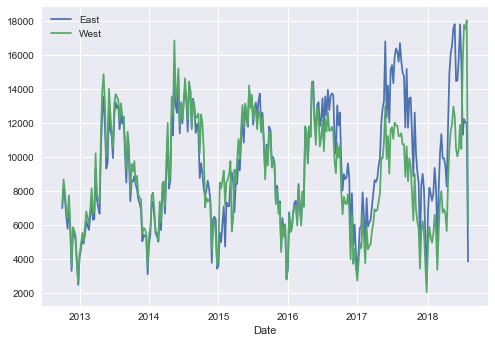

In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ['East', 'West']
data.resample('W').sum().plot()

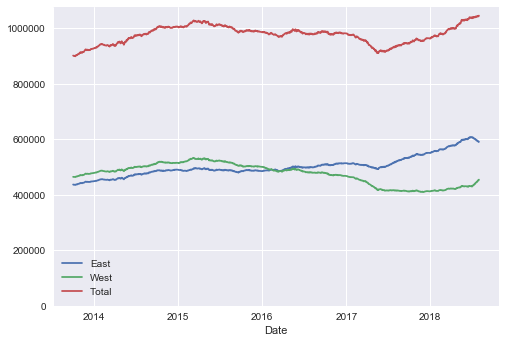

In [19]:
data['Total'] = data.West + data.East

ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None);

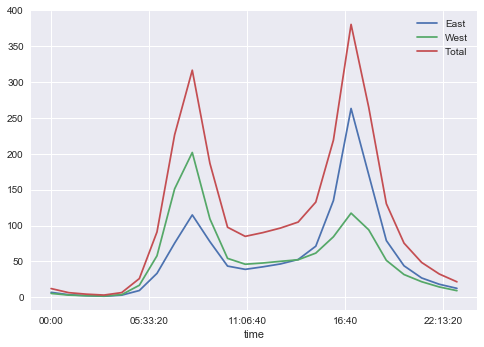

In [20]:
data.groupby(data.index.time).mean().plot()

In [22]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :7]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0


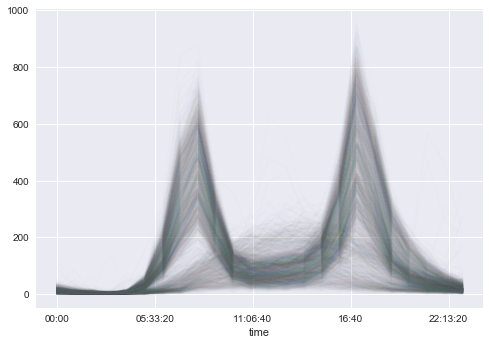

In [25]:
pivoted.plot(legend=False, alpha=0.01);